<a href="https://colab.research.google.com/github/Paulina99Sadowska/Artificial_Intelligence/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

Using recurrent networks (RNN) to predict the opening prices of Google shares from January 2017 to the end of 2017.

## Part 1 - Data Preprocessing

### Importing the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [57]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = df.iloc[:,1:2].values
print(x_train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_sc = sc.fit_transform(training_set)
print(training_set_sc)


[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [42]:
from numpy.lib.function_base import append

X = []
y = []

for i in range (60,1258):
  X.append(training_set_sc[i-60:i,0])
  y.append(training_set_sc[i,0])

X,y=np.array(X),np.array(y)
print(X)
print(y)



[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [43]:
X = np.reshape(X,(X.shape[0], X.shape[1], 1))


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [45]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50,return_sequences=True,input_shape=(X.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [47]:
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [48]:
regressor.add(LSTM(units = 50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [49]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [50]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [51]:
regressor.compile(optimizer = 'adam', loss = "mean_squared_error")

### Fitting the RNN to the Training set

In [54]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0039
Epoch 2/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0039
Epoch 3/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0041
Epoch 4/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0040
Epoch 5/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0036
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0036
Epoch 8/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0037
Epoch 9/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0035
Epoch 11/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0032
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [68]:
df2 = pd.read_csv('Google_Stock_Price_Test.csv')
y_test = df2.iloc[:,1:2].values
print(y_test)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [67]:
data_set_total = pd.concat((df['Open'],df2['Open']),axis = 0)
input = data_set_total[len(data_set_total) - len(df2)-60:].values
input =input.reshape(-1,1)
input = sc.transform(input)
X_test =[]
for i in range (60,80):
  X_test.append(input[i-60:i,0])

X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

y_prdict = regressor.predict(X_test)
y_prdict = sc.inverse_transform(y_prdict)
print(y_prdict)



1/1 [==============================] - 0s 36ms/step
[[794.78595]
 [791.9979 ]
 [792.6068 ]
 [794.174  ]
 [797.7736 ]
 [804.0498 ]
 [809.49817]
 [811.4062 ]
 [811.5411 ]
 [811.16876]
 [810.79126]
 [810.37976]
 [810.09814]
 [810.6768 ]
 [811.73236]
 [816.89777]
 [824.2837 ]
 [831.9588 ]
 [835.7735 ]
 [830.78705]]


### Visualising the results

<function matplotlib.pyplot.show(close=None, block=None)>

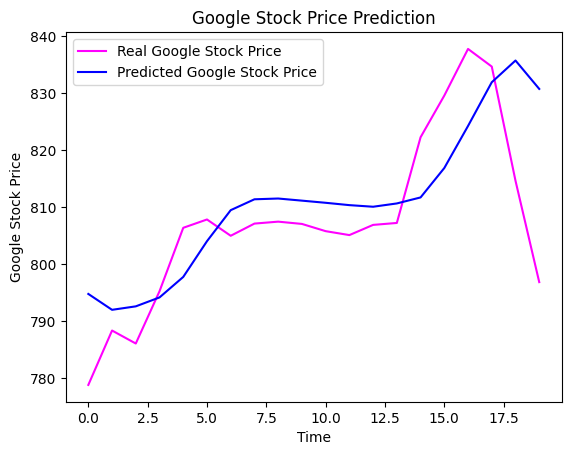

In [70]:
#the real stock prices
plt.plot(y_test, color= 'magenta', label = 'Real Google Stock Price')
#predictions
plt.plot(y_prdict, color= 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show